<a href="https://colab.research.google.com/github/felipebrazfb333/Machine-learning/blob/master/projeto_final_ciclo2_capacitacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-info">
    
<h1 style="color:#1a96f6;"> <center> <b>
Projeto Final Ciclo 2- Softex
</b> </center> </h1>
    
<h3 style="color:#1a96f6;"> <center> <b>
Machine Learning
</b></center> </h3>
    
<h3 style="color:#1a96f6;"> <center> <b>
Prof. Dr Tiago Moura
</b></center> </h3>

<h3 style="color:#1a96f6;"> <center> <b>
Discente: Felipe Braz da Silva
</b></center> </h3>

<h3 style="color:#1a96f6;"> <center> <b>
Data: 06/06/2024
</b></center> </h3>


</div>

##Carregando dataset

link para dataset no Kaggle: https://www.kaggle.com/datasets/aadarshvelu/heart-failure-prediction-clinical-records


**Informações sobre as features**

**idade**: idade do paciente (anos)

**anemia**: diminuição de glóbulos vermelhos ou hemoglobina (booleano)

**creatinina fosfoquinase (CPK)**: nível da enzima CPK no sangue (mcg/L)

**diabetes**: se o paciente tem diabetes (booleano)

**fração de ejeção**: porcentagem de sangue que sai do coração a cada contração
(porcentagem)

**pressão alta**: se o paciente tem hipertensão (booleano)

**plaquetas**: plaquetas no sangue (quiloplaquetas/mL)

**sexo**: mulher ou homem (binário)

**creatinina sérica**: nível de creatinina sérica no sangue (mg/dL)

**sódio sérico**: nível de sódio sérico no sangue (mEq/L)

**fumar**: se o paciente fuma ou não (booleano)

**tempo**: período de acompanhamento (dias)

**DEATH_EVENT**: se o paciente faleceu durante o período de acompanhamento (booleano)


In [1]:
import pandas as pd
import warnings

#evitando poluição visual
warnings.filterwarnings('ignore')

In [2]:
#carregando dataset
df = pd.read_csv("https://raw.githubusercontent.com/felipebrazfb333/Machine-learning/master/datasets/heart_failure_clinical_records.csv")

In [3]:
#pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import mlflow

#seleção de features
from sklearn.feature_selection import SelectKBest, f_classif

#registrar models
from operator import itemgetter

#seleção dinâmica
!pip install deslib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from deslib.dcs import OLA
from deslib.dcs import LCA
from deslib.dcs import MCB
from deslib.des import KNORAE
from deslib.des import KNORAU

#tunelamento
!pip install pyngrok
from pyngrok import ngrok

#emsemble
!pip install xgboost
!pip install lightgbm

#importando os modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
!pip install mlflow
import mlflow
import mlflow.sklearn


##Análise Exploratória dos dados e Preprocessamento

In [4]:
df.head(9)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [6]:
df.nunique()

age                          48
anaemia                       2
creatinine_phosphokinase    290
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   203
serum_creatinine             43
serum_sodium                 27
sex                           2
smoking                       2
time                        155
DEATH_EVENT                   2
dtype: int64

In [7]:
#Verificando se há nulos
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

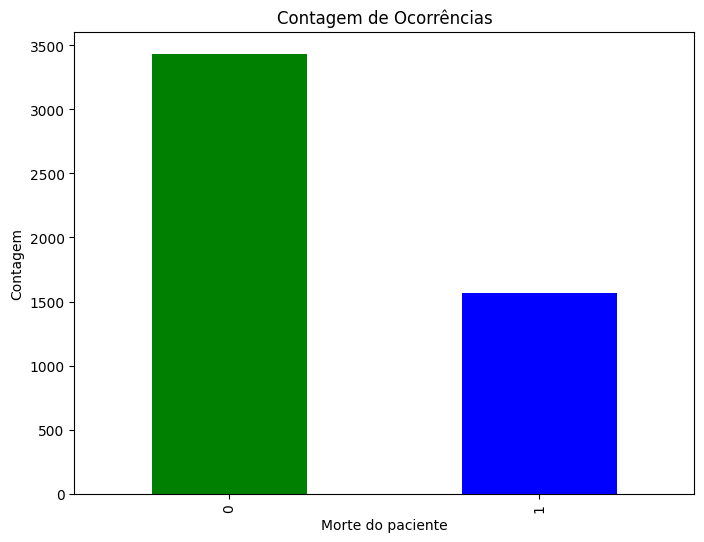

In [8]:
#grafico de barras para target
contagem = df['DEATH_EVENT'].value_counts()
plt.figure(figsize=(8, 6))
contagem.plot(kind='bar', color=["green", "blue", "red"])
plt.title('Contagem de Ocorrências')
plt.xlabel('Morte do paciente')
plt.ylabel('Contagem')
plt.show()

In [9]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

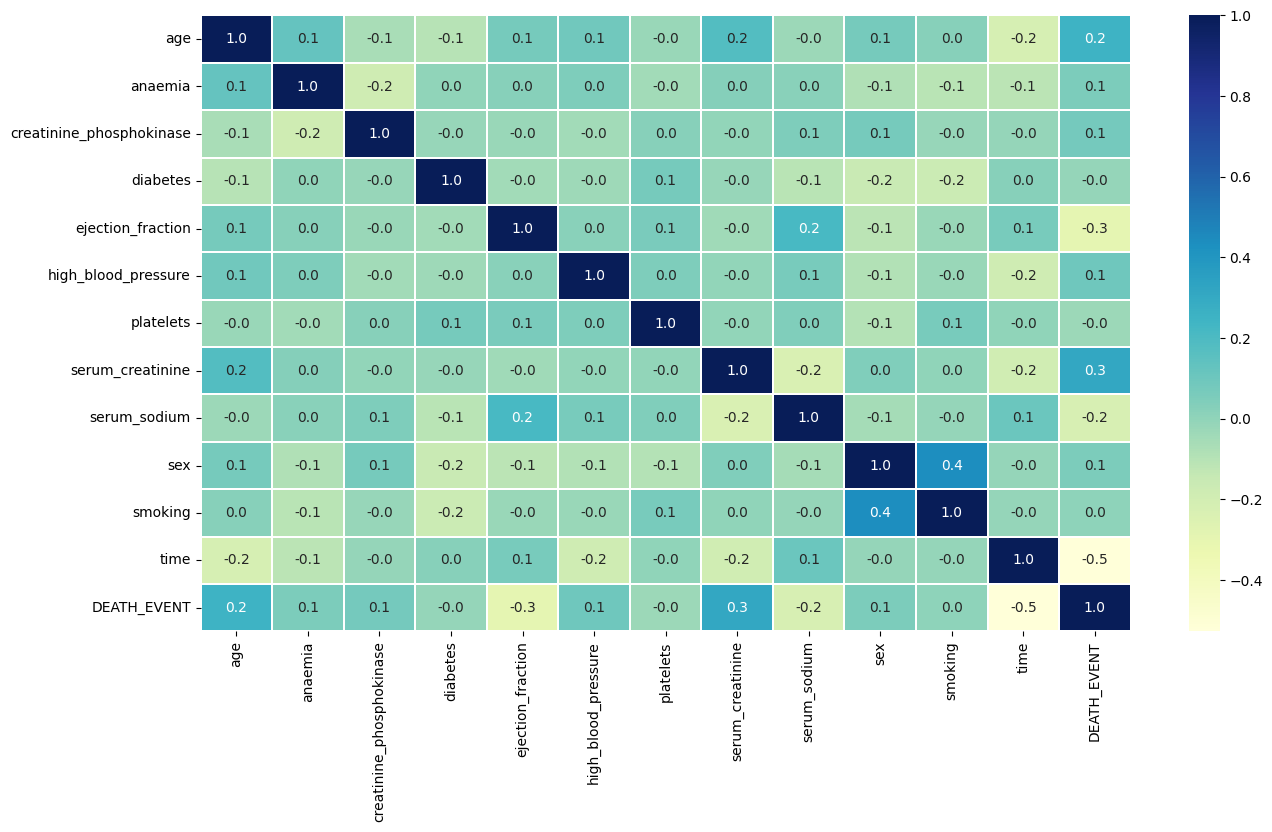

In [10]:
#Verificar a correlação entre as features
correlacao = df.corr()
plt.figure(figsize=(15, 8))
matriz_c = sb.heatmap(correlacao, annot = True, fmt=".1f",cmap="YlGnBu", linewidths=0.25)
plt.show

###Separando X e Y

In [11]:
#Separando X e y
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis = 1)

y_target = y
X_feat = X

###Normalização dos dados

In [12]:
#Normalização dos dados
min_max_escaler = MinMaxScaler()
escaled = min_max_escaler.fit_transform(X)
df_norm = pd.DataFrame(escaled)


In [13]:
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.272727,0.0,0.092498,0.0,0.469697,0.0,0.288833,0.089888,0.685714,1.0,1.0,0.298932
1,0.454545,0.0,0.004210,0.0,0.166667,0.0,0.339314,0.505618,0.485714,1.0,0.0,0.722420
2,0.090909,0.0,0.071319,1.0,0.363636,0.0,0.356286,0.044944,0.771429,0.0,0.0,0.854093
3,0.363636,1.0,0.093264,1.0,0.393939,1.0,0.367196,0.078652,0.371429,1.0,0.0,0.306050
4,1.000000,1.0,0.071319,0.0,0.242424,0.0,0.528428,0.168539,0.542857,1.0,0.0,0.163701
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.090909,0.0,0.071319,1.0,0.621212,0.0,0.627834,0.056180,0.542857,0.0,0.0,0.875445
4996,0.363636,1.0,0.071319,0.0,0.242424,1.0,0.123530,0.044944,0.914286,0.0,0.0,0.323843
4997,1.000000,1.0,0.011355,0.0,0.393939,1.0,0.207177,0.056180,0.714286,0.0,0.0,0.071174
4998,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


##Divisão de K-folds

In [14]:
#dividindo os dados utilizando Validação Cruzada K-fold
X = np.array(X)
y = np.array(y)

n_folds = 10

folds_model = StratifiedKFold(n_splits=n_folds)

x_train = []
y_train = []
x_test = []
y_test = []

for train_i, test_i in folds_model.split(X, y):
    x_train.append(X[train_i])
    x_test.append(X[test_i])
    y_train.append(y[train_i])
    y_test.append(y[test_i])


##Instanciação, treinamento e avaliação dos modelos

Para execução dos 10 k-folds foi utilizada uma estrutura de dados mista de Dicionário composto por listas.

In [15]:

models = {
    #estrutura: nome, [model, acc_list[] , precision_list[], recall_list[], specificity_list[], f1_score_list[], roc_list[]]

    # Variações do KNN
    "KNN 1": [KNeighborsClassifier(n_neighbors=3, metric="euclidean"),[],[],[],[],[],[]],
    "KNN 2": [KNeighborsClassifier(n_neighbors=5, metric="euclidean"),[],[],[],[],[],[]],
    "KNN 3": [KNeighborsClassifier(n_neighbors=3, metric="manhattan"),[],[],[],[],[],[]],

    # Variações da Decision Tree
    "Tree 1": [DecisionTreeClassifier(criterion="entropy", max_depth=1),[],[],[],[],[],[]],
    "Tree 2": [DecisionTreeClassifier(criterion="entropy", max_depth=5),[],[],[],[],[],[]],
    "Tree 3": [DecisionTreeClassifier(criterion="gini", max_depth=10),[],[],[],[],[],[]],

    # Variações da Logistic Regression
    "Logistic Regression 1": [LogisticRegression(max_iter=100, solver="liblinear"),[],[],[],[],[],[]],
    "Logistic Regression 2": [LogisticRegression(max_iter=100, solver="newton-cg"),[],[],[],[],[],[]],
    "Logistic Regression 3": [LogisticRegression(max_iter=200, solver="liblinear"),[],[],[],[],[],[]],

    #Bagging e RandomForest
    "Bagging" : [BaggingClassifier(n_estimators=50),[],[],[],[],[],[]],
    "Random Forest": [RandomForestClassifier(n_estimators=100),[],[],[],[],[],[]],

    # Modelos Ensemble
    "GBR": [GradientBoostingClassifier(n_estimators=200),[],[],[],[],[],[]],
    "XGB": [xgb.XGBClassifier(),[],[],[],[],[],[]],
    "LGB": [lgb.LGBMClassifier(),[],[],[],[],[],[]]
}


O código a seguir calcula as métricas para todos os modelos iterando sobre os 10-folds armazenando-os na estrutura acima

In [16]:
k = 10
exp1 = mlflow.set_experiment("exp_projeto_ciclo_2")
for nome, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models.items():
  with mlflow.start_run(run_name=nome):
    for i in range(k):
      model.fit(x_train[i], y_train[i])
      result = model.predict(x_test[i])

      acc = accuracy_score(y_test[i],result)
      roc = roc_auc_score(y_test[i],result)
      tn, fp, fn, tp = confusion_matrix(result, y_test[i]).ravel()
      precision = tp / (tp+fp)
      recall = tp / (tp+fn)
      specificity = tn / (tn+fp)
      f1_score = (2 * (precision * recall)) / (precision + recall)

      acc_list.append(acc)
      precision_list.append(precision)
      recall_list.append(recall)
      specificity_list.append(specificity)
      f1_score_list.append(f1_score)
      roc_list.append(roc)


    mean_acc = np.mean(acc_list)
    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)
    mean_specificity = np.mean(specificity_list)
    mean_f1_score = np.mean(f1_score_list)
    mean_roc = np.mean(roc_list)

    mlflow.log_metric("mean_acc", mean_acc)
    mlflow.log_metric("mean_precision", mean_precision)
    mlflow.log_metric("mean_recall", mean_recall)
    mlflow.log_metric("mean_specificity", mean_specificity)
    mlflow.log_metric("mean_f1_score", mean_f1_score)
    mlflow.log_metric("mean_roc", mean_recall)
    #mlflow.autolog(log_input_examples=True)

    #salvar parametros
    params = model.get_params()

    for p_name, p_value in params.items():
      mlflow.log_param(p_name, p_value)

    mlflow.sklearn.log_model(model, nome)
    mlflow.end_run()

get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background

2024/06/07 02:05:56 INFO mlflow.tracking.fluent: Experiment with name 'exp_projeto_ciclo_2' does not exist. Creating a new experiment.


[LightGBM] [Info] Number of positive: 1412, number of negative: 3088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313778 -> initscore=-0.782516
[LightGBM] [Info] Start training from score -0.782516
[LightGBM] [Info] Number of positive: 1412, number of negative: 3088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 12
[LightGBM] [Info] [binary:

Para melhor visualização de como os dados estão armazenados observe o trecho de código a seguir:

In [17]:
for name, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models.items():
  print(name)
  print(acc_list)
  print(precision_list)
  print(recall_list)
  print(specificity_list)
  print(f1_score_list)
  print(recall_list)
  print("\n")


KNN 1
[0.82, 0.81, 0.904, 0.986, 0.998, 0.994, 0.988, 0.994, 0.992, 1.0]
[0.7307692307692307, 0.6923076923076923, 0.8535031847133758, 0.9936305732484076, 1.0, 0.9872611464968153, 1.0, 0.9872611464968153, 0.9936305732484076, 1.0]
[0.7037037037037037, 0.6967741935483871, 0.8427672955974843, 0.9629629629629629, 0.9936708860759493, 0.9935897435897436, 0.9631901840490797, 0.9935897435897436, 0.9811320754716981, 1.0]
[0.8757396449704142, 0.8608695652173913, 0.9325513196480938, 0.9970414201183432, 1.0, 0.9941860465116279, 1.0, 0.9941860465116279, 0.9970674486803519, 1.0]
[0.7169811320754716, 0.6945337620578778, 0.8481012658227849, 0.9780564263322883, 0.9968253968253968, 0.9904153354632588, 0.98125, 0.9904153354632588, 0.9873417721518988, 1.0]
[0.7037037037037037, 0.6967741935483871, 0.8427672955974843, 0.9629629629629629, 0.9936708860759493, 0.9935897435897436, 0.9631901840490797, 0.9935897435897436, 0.9811320754716981, 1.0]


KNN 2
[0.788, 0.812, 0.896, 0.988, 0.998, 0.994, 0.996, 0.994, 0.9

In [18]:
#salvando na variável a seguir a média dos 10-folds para cada métrica
models_acc = []

for name, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models.items():
  print(name)
  acc = np.mean(acc_list)
  models_acc.append((name,acc,model))
  print("ACC: {} %".format(round(np.mean(acc_list)*100,3)))
  print("Precision: {}".format(round(np.mean(precision_list),3)))
  print("Recall: {}".format(round(np.mean(recall_list),3)))
  print("Specificity: {}".format(round(np.mean(specificity_list),3)))
  print("F1_score: {}".format(round(np.mean(f1_score_list),3)))
  print("Curva AOC: {}".format(round(np.mean(roc_list),3)))
  print("\n")


KNN 1
ACC: 94.86 %
Precision: 0.924
Recall: 0.913
Specificity: 0.965
F1_score: 0.918
Curva AOC: 0.942


KNN 2
ACC: 94.6 %
Precision: 0.921
Recall: 0.911
Specificity: 0.963
F1_score: 0.916
Curva AOC: 0.939


KNN 3
ACC: 95.0 %
Precision: 0.926
Recall: 0.916
Specificity: 0.966
F1_score: 0.921
Curva AOC: 0.943


Tree 1
ACC: 85.54 %
Precision: 0.628
Recall: 0.877
Specificity: 0.85
F1_score: 0.731
Curva AOC: 0.794


Tree 2
ACC: 92.08 %
Precision: 0.86
Recall: 0.887
Specificity: 0.937
F1_score: 0.872
Curva AOC: 0.904


Tree 3
ACC: 98.52 %
Precision: 0.972
Recall: 0.98
Specificity: 0.987
F1_score: 0.976
Curva AOC: 0.982


Logistic Regression 1
ACC: 84.26 %
Precision: 0.662
Recall: 0.802
Specificity: 0.857
F1_score: 0.725
Curva AOC: 0.794


Logistic Regression 2
ACC: 84.38 %
Precision: 0.706
Recall: 0.777
Specificity: 0.871
F1_score: 0.739
Curva AOC: 0.806


Logistic Regression 3
ACC: 84.26 %
Precision: 0.662
Recall: 0.802
Specificity: 0.857
F1_score: 0.725
Curva AOC: 0.794


Bagging
ACC: 99.1 

##Seleção de Features

Utilizando seleção de features com k = 5 features para observar se haverá alterações nodesempenho do modelo

In [19]:
f_classif_t = SelectKBest(score_func=f_classif, k=5)

modelofeat = f_classif_t.fit(X, y)

selected_features = X_feat.columns[modelofeat.get_support()]

In [20]:
modelofeat.scores_

array([3.31615272e+02, 1.48941361e+01, 3.19551871e+01, 6.35244353e-01,
       4.68324626e+02, 4.45779008e+01, 4.97087065e+00, 5.36246991e+02,
       2.72428953e+02, 1.55006378e+01, 4.41353739e-01, 1.92420817e+03])

In [21]:
cols = modelofeat.get_support(indices=True)
X_sd = X_feat.iloc[:,cols]
X_sd

,age,ejection_fraction,serum_creatinine,serum_sodium,time
0,55.0,45,1.3,137,88
1,65.0,25,5.0,130,207
2,45.0,38,0.9,140,244
3,60.0,40,1.2,126,90
4,95.0,30,2.0,132,50
...,...,...,...,...,...
4995,45.0,55,1.0,132,250
4996,60.0,30,0.9,145,95
4997,95.0,40,1.0,138,24
4998,65.0,20,2.7,116,8


In [22]:
#Dividindo os dados utilizando validação cruzada K-fold

X = np.array(X)
y = np.array(y)

n_folds = 10

folds_model = StratifiedKFold(n_splits=n_folds)

x_train = []
y_train = []
x_test = []
y_test = []

for train_i, test_i in folds_model.split(X, y):
    x_train.append(X[train_i])
    x_test.append(X[test_i])
    y_train.append(y[train_i])
    y_test.append(y[test_i])

No trecho a seguir os modelos serão instanciados,bem como a estrutura de dados mista que foi utilizada

In [23]:
models_2 = {
    #estrutura: nome, [model, acc_list[] , precision_list[], recall_list[], specificity_list[], f1_score_list[], roc_list[]]

    # Variações do KNN
    "KNN 1 SF": [KNeighborsClassifier(n_neighbors=3, metric="euclidean"),[],[],[],[],[],[]],
    "KNN 2 SF": [KNeighborsClassifier(n_neighbors=5, metric="euclidean"),[],[],[],[],[],[]],
    "KNN 3 SF": [KNeighborsClassifier(n_neighbors=3, metric="manhattan"),[],[],[],[],[],[]],

    # Variações da Decision Tree
    "Tree 1 SF": [DecisionTreeClassifier(criterion="entropy", max_depth=1),[],[],[],[],[],[]],
    "Tree 2 SF": [DecisionTreeClassifier(criterion="entropy", max_depth=5),[],[],[],[],[],[]],
    "Tree 3 SF": [DecisionTreeClassifier(criterion="gini", max_depth=10),[],[],[],[],[],[]],

    # Variações da Neural Network
    "Logistic Regression 1 SF": [LogisticRegression(max_iter=100, solver="liblinear"),[],[],[],[],[],[]],
    "Logistic Regression 2 SF": [LogisticRegression(max_iter=100, solver="newton-cg"),[],[],[],[],[],[]],
    "Logistic Regression 3 SF": [LogisticRegression(max_iter=200, solver="liblinear"),[],[],[],[],[],[]],

    #Bagging e RandomForest
    "Bagging SF" : [BaggingClassifier(n_estimators=50),[],[],[],[],[],[]],
    "Random Forest SF": [RandomForestClassifier(n_estimators=100),[],[],[],[],[],[]],

    # Modelos Ensemble
    "GBR SF": [GradientBoostingClassifier(n_estimators=200),[],[],[],[],[],[]],
    "XGB SF": [xgb.XGBClassifier(),[],[],[],[],[],[]],
    "LGB SF": [lgb.LGBMClassifier(),[],[],[],[],[],[]]
}


O código a seguir calcula as métricas para todos os modelos iterando sobre os 10-folds e armazenando-as na estrutura acima

In [24]:

k = 10
for nome, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models_2.items():
  with mlflow.start_run(run_name=nome):
    for i in range(k):
      model.fit(x_train[i], y_train[i])
      result = model.predict(x_test[i])

      acc = accuracy_score(y_test[i],result)
      roc = roc_auc_score(y_test[i],result)
      tn, fp, fn, tp = confusion_matrix(result, y_test[i]).ravel()
      precision = tp / (tp+fp)
      recall = tp / (tp+fn)
      specificity = tn / (tn+fp)
      f1_score = (2 * (precision * recall)) / (precision + recall)

      acc_list.append(acc)
      precision_list.append(precision)
      recall_list.append(recall)
      specificity_list.append(specificity)
      f1_score_list.append(f1_score)
      roc_list.append(roc)


    mean_acc = np.mean(acc_list)
    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)
    mean_specificity = np.mean(specificity_list)
    mean_f1_score = np.mean(f1_score_list)
    mean_roc = np.mean(roc_list)

    mlflow.log_metric("mean_acc", mean_acc)
    mlflow.log_metric("mean_precision", mean_precision)
    mlflow.log_metric("mean_recall", mean_recall)
    mlflow.log_metric("mean_specificity", mean_specificity)
    mlflow.log_metric("mean_f1_score", mean_f1_score)
    mlflow.log_metric("mean_roc", mean_recall)

    params = model.get_params()

    for p_name, p_value in params.items():
      mlflow.log_param(p_name, p_value)


    mlflow.sklearn.log_model(model, nome)
    mlflow.end_run()

get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background

[LightGBM] [Info] Number of positive: 1412, number of negative: 3088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313778 -> initscore=-0.782516
[LightGBM] [Info] Start training from score -0.782516
[LightGBM] [Info] Number of positive: 1412, number of negative: 3088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 12
[LightGBM] [Info] [binary:

In [25]:
#o termo SF no final de cada modelo indica queo modelo é alimentado com os dados da Seleção de features

for name, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models_2.items():
  print(name)
  acc = np.mean(acc_list)
  models_acc.append((name,acc,model))
  print("ACC: {} %".format(round(np.mean(acc_list)*100,3)))
  print("Precision: {}".format(round(np.mean(precision_list),3)))
  print("Recall: {}".format(round(np.mean(recall_list),3)))
  print("Specificity: {}".format(round(np.mean(specificity_list),3)))
  print("F1_score: {}".format(round(np.mean(f1_score_list),3)))
  print("Curva AOC: {}".format(round(np.mean(roc_list),3)))
  print("\n")

KNN 1 SF
ACC: 94.86 %
Precision: 0.924
Recall: 0.913
Specificity: 0.965
F1_score: 0.918
Curva AOC: 0.942


KNN 2 SF
ACC: 94.6 %
Precision: 0.921
Recall: 0.911
Specificity: 0.963
F1_score: 0.916
Curva AOC: 0.939


KNN 3 SF
ACC: 95.0 %
Precision: 0.926
Recall: 0.916
Specificity: 0.966
F1_score: 0.921
Curva AOC: 0.943


Tree 1 SF
ACC: 85.54 %
Precision: 0.628
Recall: 0.877
Specificity: 0.85
F1_score: 0.731
Curva AOC: 0.794


Tree 2 SF
ACC: 92.08 %
Precision: 0.86
Recall: 0.887
Specificity: 0.937
F1_score: 0.872
Curva AOC: 0.904


Tree 3 SF
ACC: 98.6 %
Precision: 0.973
Recall: 0.982
Specificity: 0.988
F1_score: 0.977
Curva AOC: 0.982


Logistic Regression 1 SF
ACC: 84.26 %
Precision: 0.662
Recall: 0.802
Specificity: 0.857
F1_score: 0.725
Curva AOC: 0.794


Logistic Regression 2 SF
ACC: 84.38 %
Precision: 0.706
Recall: 0.777
Specificity: 0.871
F1_score: 0.739
Curva AOC: 0.806


Logistic Regression 3 SF
ACC: 84.26 %
Precision: 0.662
Recall: 0.802
Specificity: 0.857
F1_score: 0.725
Curva AOC:

##Registro dos três modelos com melhor desempenho (baseado na acurácia);

Os modelos são registrados baseados na execução inicial e na execução com seleção de features. O critério utilizado foi a maior acurácia.

In [26]:

acc_ordenada = sorted(models_acc, key=itemgetter(1), reverse=True)
print(acc_ordenada)

[('LGB', 0.9927999999999999, LGBMClassifier()), ('LGB SF', 0.9927999999999999, LGBMClassifier()), ('XGB', 0.9926, XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('XGB SF', 0.9926, XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsampl

In [27]:
from mlflow import sklearn
cont = 0

for (model_name, accuracy, model) in acc_ordenada:
    if cont > 2:
        break

    with mlflow.start_run(run_name=model_name+" REGISTRADO") as run:
        run_id = run.info.run_id

        sklearn.log_model(model, model_name)
        params = model.get_params()

        tag = {"accuracy": accuracy}
        for p_name, p_value in params.items():
            tag[p_name] = p_value

        mlflow.register_model(
            model_uri="runs:/{}/{}".format(run_id, model_name),
            name=model_name,
            tags=tag
        )

    cont += 1


Successfully registered model 'LGB'.
Created version '1' of model 'LGB'.
Successfully registered model 'LGB SF'.
Created version '1' of model 'LGB SF'.
Successfully registered model 'XGB'.
Created version '1' of model 'XGB'.


##Tunelamento para conexão com mlflow

In [28]:
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2fvfcqiF8cgOicPUCM4jOXULHnC_7JmBKMi3eRLW43UEcefcG"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("Endereço do MLflow:", ngrok_tunnel.public_url)

Endereço do MLflow: https://696a-34-48-50-255.ngrok-free.app


##Seleção dinâmica

In [29]:
models_3 = {
    "bagging": [model,[],[],[],[],[],[]],
    "model_knu_bg": [model,[],[],[],[],[],[]],
    "model_kne_bg": [model,[],[],[],[],[],[]],
    "model_lca_bg": [model,[],[],[],[],[],[]],
    "model_ola_bg": [model,[],[],[],[],[],[]],
    "model_mcb_bg": [model,[],[],[],[],[],[]]
}


In [30]:
for i in range(k):
  arv_bg = BaggingClassifier(n_estimators=50)
  arv_bg.fit(x_train[i], y_train[i])
  #separando dados para seleção dinâmica
  x_train_s, x_dsel, y_train_s, y_dsel = train_test_split(x_train[i], y_train[i], test_size=0.5,random_state=None)
  model_knu = KNORAU(arv_bg, k=5)
  model_kne = KNORAE(arv_bg, k=5)
  model_lca = LCA(arv_bg, k=5)
  model_ola = OLA(arv_bg, k=5)
  model_mcb = MCB(arv_bg, k=5)

  model_knu.fit(x_dsel, y_dsel)
  model_kne.fit(x_dsel, y_dsel)
  model_lca.fit(x_dsel, y_dsel)
  model_ola.fit(x_dsel, y_dsel)
  model_mcb.fit(x_dsel, y_dsel)

  models_3["bagging"][0] = arv_bg
  models_3["model_knu_bg"][0] = model_knu
  models_3["model_kne_bg"][0] = model_kne
  models_3["model_lca_bg"][0] = model_lca
  models_3["model_ola_bg"][0] = model_ola
  models_3["model_mcb_bg"][0] = model_mcb

  for nome, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models_3.items():
      result = model.predict(x_test[i])
      acc = accuracy_score(y_test[i],result)
      roc = roc_auc_score(y_test[i],result)
      tn, fp, fn, tp = confusion_matrix(result, y_test[i]).ravel()
      precision = tp / (tp+fp)
      recall = tp / (tp+fn)
      specificity = tn / (tn+fp)
      f1_score = (2 * (precision * recall)) / (precision + recall)

      acc_list.append(acc)
      precision_list.append(precision)
      recall_list.append(recall)
      specificity_list.append(specificity)
      f1_score_list.append(f1_score)
      roc_list.append(roc)


In [31]:
for nome, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models_3.items():
  with mlflow.start_run(run_name=nome):
    mean_acc = np.mean(acc_list)
    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)
    mean_specificity = np.mean(specificity_list)
    mean_f1_score = np.mean(f1_score_list)
    mean_roc = np.mean(roc_list)

    mlflow.log_metric("mean_acc", mean_acc)
    mlflow.log_metric("mean_precision", mean_precision)
    mlflow.log_metric("mean_recall", mean_recall)
    mlflow.log_metric("mean_specificity", mean_specificity)
    mlflow.log_metric("mean_f1_score", mean_f1_score)
    mlflow.log_metric("mean_roc", mean_recall)

    mlflow.sklearn.log_model(model, nome)
    mlflow.end_run()


In [32]:
#modelos gerados como random forest

In [33]:
models_4 = {
    "forest": [model,[],[],[],[],[],[]],
    "model_knu_rf": [model,[],[],[],[],[],[]],
    "model_kne_rf": [model,[],[],[],[],[],[]],
    "model_lca_rf": [model,[],[],[],[],[],[]],
    "model_ola_rf": [model,[],[],[],[],[],[]],
    "model_mcb_rf": [model,[],[],[],[],[],[]]
}


In [34]:
for i in range(k):
  arv_bg = RandomForestClassifier(n_estimators=50)
  arv_bg.fit(x_train[i], y_train[i])
  #separando dados para seleção dinâmica
  x_train_s, x_dsel, y_train_s, y_dsel = train_test_split(x_train[i], y_train[i], test_size=0.5,random_state=None)
  model_knu = KNORAU(arv_bg, k=5)
  model_kne = KNORAE(arv_bg, k=5)
  model_lca = LCA(arv_bg, k=5)
  model_ola = OLA(arv_bg, k=5)
  model_mcb = MCB(arv_bg, k=5)

  model_knu.fit(x_dsel, y_dsel)
  model_kne.fit(x_dsel, y_dsel)
  model_lca.fit(x_dsel, y_dsel)
  model_ola.fit(x_dsel, y_dsel)
  model_mcb.fit(x_dsel, y_dsel)

  models_4["forest"][0] = arv_bg
  models_4["model_knu_rf"][0] = model_knu
  models_4["model_kne_rf"][0] = model_kne
  models_4["model_lca_rf"][0] = model_lca
  models_4["model_ola_rf"][0] = model_ola
  models_4["model_mcb_rf"][0] = model_mcb

  for nome, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models_4.items():
      result = model.predict(x_test[i])
      acc = accuracy_score(y_test[i],result)
      roc = roc_auc_score(y_test[i],result)
      tn, fp, fn, tp = confusion_matrix(result, y_test[i]).ravel()
      precision = tp / (tp+fp)
      recall = tp / (tp+fn)
      specificity = tn / (tn+fp)
      f1_score = (2 * (precision * recall)) / (precision + recall)

      acc_list.append(acc)
      precision_list.append(precision)
      recall_list.append(recall)
      specificity_list.append(specificity)
      f1_score_list.append(f1_score)
      roc_list.append(roc)


In [35]:
for nome, [model, acc_list, precision_list, recall_list, specificity_list, f1_score_list, roc_list] in models_3.items():
  with mlflow.start_run(run_name=nome):
    mean_acc = np.mean(acc_list)
    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)
    mean_specificity = np.mean(specificity_list)
    mean_f1_score = np.mean(f1_score_list)
    mean_roc = np.mean(roc_list)

    mlflow.log_metric("mean_acc", mean_acc)
    mlflow.log_metric("mean_precision", mean_precision)
    mlflow.log_metric("mean_recall", mean_recall)
    mlflow.log_metric("mean_specificity", mean_specificity)
    mlflow.log_metric("mean_f1_score", mean_f1_score)
    mlflow.log_metric("mean_roc", mean_recall)

    mlflow.sklearn.log_model(model, nome)
    mlflow.end_run()


##Carregamento dos modelos registrados

Carregamento dos modelos que foram registrados

In [40]:
import mlflow

def show_info(model, id_run):
  print("*"*15)
  print("Informações do modelo: {}".format(model))
  print()
  run = mlflow.get_run(id_run)
  metrics = run.data.metrics

  for key, value in metrics.items():
    print("{} : {}".format(key, value))
  print("*"*15)



logged_model1 = 'runs:/0d2c9bee9e4a47c2836ee47952467203/LGB'
logged_model2 = 'runs:/8c6cb47d224345cfb495e03bbf636ade/LGB SF'
logged_model3 = 'runs:/d144b5edc97c43deaa8680819a7a825a/XGB'

loaded_model1 = mlflow.pyfunc.load_model(logged_model1)
loaded_model2 = mlflow.pyfunc.load_model(logged_model2)
loaded_model3 = mlflow.pyfunc.load_model(logged_model3)

run_id1 = logged_model1.split('/')[1]
run_id2 = logged_model2.split('/')[1]
run_id3 = logged_model3.split('/')[1]

print("Modelos registrados\n")
show_info(loaded_model1, run_id1)
show_info(loaded_model2, run_id2)
show_info(loaded_model3, run_id3)



Modelos registrados

***************
Informações do modelo: mlflow.pyfunc.loaded_model:
  artifact_path: LGB
  flavor: mlflow.sklearn
  run_id: 0d2c9bee9e4a47c2836ee47952467203


***************
***************
Informações do modelo: mlflow.pyfunc.loaded_model:
  artifact_path: LGB SF
  flavor: mlflow.sklearn
  run_id: 8c6cb47d224345cfb495e03bbf636ade


***************
***************
Informações do modelo: mlflow.pyfunc.loaded_model:
  artifact_path: XGB
  flavor: mlflow.sklearn
  run_id: d144b5edc97c43deaa8680819a7a825a


***************


In [50]:
import mlflow

def show_info(model, run_id):
    print("Informações do modelo: {}".format(model))
    try:
        print(model.metadata.signature)
    except AttributeError:
        print("O modelo não possui metadados de assinatura.")

    try:
        params = model.get_params()
        print("\nParâmetros do Modelo:")
        for key, value in params.items():
            print("{} : {}".format(key, value))
    except AttributeError:
        print("O modelo não possui parâmetros.")

    try:
        run = mlflow.get_run(run_id)
        metrics = run.data.metrics
        print("\nMétricas do Modelo:")
        for key, value in metrics.items():
            print("{} : {}".format(key, value))
    except Exception as e:
        print(f"Erro ao obter métricas: {e}")

logged_model1 = 'runs:/f9fbc47bd380462e9d6c0a8a5cc00127/LGB SF'
logged_model2 = 'runs:/30818eb7822e4e64aca87c754cbf538d/Random Forest SF'
logged_model3 = 'runs:/9ad13c01eb7843e5834763cb80780640/XGB SF'

loaded_model1 = mlflow.pyfunc.load_model(logged_model1)
loaded_model2 = mlflow.pyfunc.load_model(logged_model2)
loaded_model3 = mlflow.pyfunc.load_model(logged_model3)

run_id1 = logged_model1.split('/')[1]
run_id2 = logged_model2.split('/')[1]
run_id3 = logged_model3.split('/')[1]

show_info(loaded_model1, run_id1)
show_info(loaded_model2, run_id2)
show_info(loaded_model3, run_id3)


Informações do modelo: mlflow.pyfunc.loaded_model:
  artifact_path: LGB SF
  flavor: mlflow.sklearn
  run_id: f9fbc47bd380462e9d6c0a8a5cc00127

None
O modelo não possui parâmetros.

Métricas do Modelo:
Informações do modelo: mlflow.pyfunc.loaded_model:
  artifact_path: Random Forest SF
  flavor: mlflow.sklearn
  run_id: 30818eb7822e4e64aca87c754cbf538d

None
O modelo não possui parâmetros.

Métricas do Modelo:
Informações do modelo: mlflow.pyfunc.loaded_model:
  artifact_path: XGB SF
  flavor: mlflow.sklearn
  run_id: 9ad13c01eb7843e5834763cb80780640

None
O modelo não possui parâmetros.

Métricas do Modelo:


In [49]:
import mlflow

def show_info(model):
  print("Informações do modelo: {}".format(model))
  print(model.metadata.signature)
  #run_id = model.split('/')[1]
  #run = mlflow.get_run(run_id)
  params = model.get_params()

  #metrics = run.data.metrics

  print("\nMétricas do Modelo:")

  for key, value in metrics.items():
    print("{} : {}".format(key, value))



logged_model1 = 'runs:/f9fbc47bd380462e9d6c0a8a5cc00127/LGB SF'
logged_model2 = 'runs:/30818eb7822e4e64aca87c754cbf538d/Random Forest SF'
logged_model3 = 'runs:/9ad13c01eb7843e5834763cb80780640/XGB SF'

loaded_model1 = mlflow.pyfunc.load_model(logged_model1)
loaded_model2 = mlflow.pyfunc.load_model(logged_model2)
loaded_model3 = mlflow.pyfunc.load_model(logged_model3)

show_info(loaded_model1)
show_info(loaded_model2)
show_info(loaded_model3)

Informações do modelo: mlflow.pyfunc.loaded_model:
  artifact_path: LGB SF
  flavor: mlflow.sklearn
  run_id: f9fbc47bd380462e9d6c0a8a5cc00127

None


AttributeError: 'PyFuncModel' object has no attribute 'get_params'

In [44]:

x_train, x_test , y_train, y_test = train_test_split(X_feat, y_target)

import mlflow

logged_model1 = 'runs:/0d050097386a4c1582d57c66e45adc7b/LGB SF'
logged_model2 = 'runs:/b276812c01c642dfb9c72c291265b890/Random Forest SF'
logged_model3 = 'runs:/59d9b6b77a02459eb2065e39a1f6212a/XGB SF'

loaded_model1 = mlflow.pyfunc.load_model(logged_model1)
loaded_model2 = mlflow.pyfunc.load_model(logged_model2)
loaded_model3 = mlflow.pyfunc.load_model(logged_model3)

y_predict1 = loaded_model1.predict(x_test)
y_predict2 = loaded_model2.predict(x_test)
y_predict3 = loaded_model3.predict(x_test)

acc1 = accuracy_score(y_predict1, y_test)
acc2 = accuracy_score(y_predict2, y_test)
acc3 = accuracy_score(y_predict3, y_test)

print("Acurácia")
print("Model 1: {}".format(round(acc1, 5)))
print("Model 2: {}".format(round(acc2, 5)))
print("Model 3: {}".format(round(acc3, 5)))




OSError: No such file or directory: '/content/mlruns/861639179028217621/0d050097386a4c1582d57c66e45adc7b/artifacts/LGB SF'